In [1]:
# Libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
#import cmocean
import matplotlib.ticker as mticker
import pandas as pd
import array as ar
import matplotlib.patches as mpatches
import cartopy.feature as cf
import seaborn as sn

#import plotly.express as px
#from plotly.subplots import make_subplots #to make subplots for imshow
#import plotly.graph_objects as go
import metpy
from metpy.units import units #had to install metpy
import wrf #had to install to have wrf-python things for vertical levels
import metpy.calc as mpcalc 

import pingouin as pg

import warnings
warnings.filterwarnings("ignore") #to not see the warnings

#to copy and paste images, it can be done with shift + right button

In [2]:
# Open datasets:
ds_ERA = xr.open_dataset('/media/irene/Elements/Laptop_dec2023/Thesis_data/sobs/ERA5-WTQ-SNOWcase.nc') 

#WRF (regridded to era5 2d spatial resolution)
ds_wtho, ds_qtho = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Thompson/reg_wrftho_W-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Thompson/reg_wrftho_QV-4to9.nc')
ds_wmor, ds_qmor = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Morrison/reg_wrfmor_W-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Morrison/reg_wrfmor_QV-4to9.nc')
ds_wcam, ds_qcam = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/CAM/reg_wrfcam_W-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/CAM/reg_wrfcam_QV-4to9.nc')
ds_wylin, ds_qylin = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Ylin/reg_wrfylin_W-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Ylin/reg_wrfylin_QV-4to9.nc')
ds_wwdm7, ds_qwdm7 = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM7/reg_wrfwdm7_W-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM7/reg_wrfwdm7_QV-4to9.nc')
ds_wwdm6, ds_qwdm6 = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM6/reg_wrfwdm6_W-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM6/reg_wrfwdm6_QV-4to9.nc')

#to compute pressure levels need only P and PB of WRF
ds_Ptho, ds_PBtho = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Thompson/reg_wrftho_P-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Thompson/reg_wrftho_PB-4to9.nc')
ds_Pmor, ds_PBmor = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Morrison/reg_wrfmor_P-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Morrison/reg_wrfmor_PB-4to9.nc')
ds_Pcam, ds_PBcam = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/CAM/reg_wrfcam_P-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/CAM/reg_wrfcam_PB-4to9.nc')
ds_Pylin, ds_PBylin = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Ylin/reg_wrfylin_P-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Ylin/reg_wrfylin_PB-4to9.nc')
ds_Pwdm7, ds_PBwdm7 = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM7/reg_wrfwdm7_P-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM7/reg_wrfwdm7_PB-4to9.nc')
ds_Pwdm6, ds_PBwdm6 = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM6/reg_wrfwdm6_P-4to9.nc'), xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM6/reg_wrfwdm6_PB-4to9.nc')

In [3]:
ds_ttho = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Thompson/reg_wrftho_TH-4to9.nc')
ds_tmor = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Morrison/reg_wrfmor_TH-4to9.nc')
ds_tcam = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/CAM/reg_wrfcam_TH-4to9.nc')
ds_tylin = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/Ylin/reg_wrfylin_TH-4to9.nc')
ds_twdm7 = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM7/reg_wrfwdm7_TH-4to9.nc')
ds_twdm6 = xr.open_dataset('/media/irene/Elements/wrf_micro_snow/WDM6/reg_wrfwdm6_TH-4to9.nc')

In [4]:
# Cut time
ds_ERA = ds_ERA.sel(time=slice('2018-10-04T00:00:00.000000000', '2018-10-09T23:00:00.000000000'))

#define time
times= ['2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09']

In [5]:
# Define Nam Co
lat1, lat2 = 27, 35
lon1, lon2 = 90, 105
sn1,sn2 = 56, 292 #27.006  - 34.99
we1, we2 = 507, 886 #90.01 - 105.02

#cut w, theta and q
ds_ERAc = ds_ERA.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_wthoc = ds_wtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_wmorc = ds_wmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_wcamc = ds_wcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_wylinc = ds_wylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_wwdm7c = ds_wwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_wwdm6c = ds_wwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))


ds_qthoc = ds_qtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qmorc = ds_qmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qcamc = ds_qcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qylinc = ds_qylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qwdm7c = ds_qwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qwdm6c = ds_qwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

#cut variables for vertical levels
ds_Pthoc, ds_PBthoc = ds_Ptho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pmorc, ds_PBmorc = ds_Pmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pcamc, ds_PBcamc = ds_Pcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pylinc, ds_PBylinc = ds_Pylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pwdm7c, ds_PBwdm7c = ds_Pwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pwdm6c, ds_PBwdm6c = ds_Pwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

In [6]:
# Theta
ds_tthoc = ds_ttho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tmorc = ds_tmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tcamc = ds_tcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tylinc = ds_tylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_twdm7c = ds_twdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_twdm6c = ds_twdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

In [7]:
# Average over time and 2d space for ERA5 variables
meanl_qERA = (ds_ERAc.q).mean(dim=('latitude', 'longitude', 'time')) #q in kg/kg

# Convert w of ERA from Pa/s to m/s: compute vertical velocity from omega
l_wERA = metpy.calc.vertical_velocity(ds_ERAc.w, ds_ERAc.level * units.hPa, ds_ERAc.t * units.kelvin, mixing_ratio=ds_ERAc.q)
meanl_wERA =(l_wERA).mean(dim=('latitude', 'longitude', 'time'))  #sel 98,105

In [8]:
# THETA
# Average over time and 2d space for ERA5 variables
meanl_tERA = (ds_ERAc.t).mean(dim=('latitude', 'longitude', 'time')) #temperature in K

# Compute potential temperature of ERA5
meanl_thERA = metpy.calc.potential_temperature(ds_ERA.level * units.hPa, meanl_tERA * units.kelvin)

In [9]:
# Choose the target levels (e.g., 49 new levels)
target_levels = np.arange(49)

# Interpolate W to 49 levels instead of 50
ids_wthoc = ds_wthoc.interp(bottom_top_stag=target_levels, method='linear', kwargs={'fill_value': 'extrapolate'})
ids_wmorc = ds_wmorc.interp(bottom_top_stag=target_levels, method='linear', kwargs={'fill_value': 'extrapolate'})
ids_wcamc = ds_wcamc.interp(bottom_top_stag=target_levels, method='linear', kwargs={'fill_value': 'extrapolate'})
ids_wylinc = ds_wylinc.interp(bottom_top_stag=target_levels, method='linear', kwargs={'fill_value': 'extrapolate'})
ids_wwdm7c = ds_wwdm7c.interp(bottom_top_stag=target_levels, method='linear', kwargs={'fill_value': 'extrapolate'})
ids_wwdm6c = ds_wwdm6c.interp(bottom_top_stag=target_levels, method='linear', kwargs={'fill_value': 'extrapolate'})

In [10]:
# Compute pressure levels of wrf variables (to convert from wrf vertical coordinate system to ERA5 vertical coordinates)
thopr_lev = (ds_Pthoc.P + ds_PBthoc.PB)/100 #/100 is to have it in hPa
morpr_lev = (ds_Pmorc.P + ds_PBmorc.PB)/100
campr_lev = (ds_Pcamc.P + ds_PBcamc.PB)/100
ylinpr_lev = (ds_Pylinc.P + ds_PBylinc.PB)/100
wdm7pr_lev = (ds_Pwdm7c.P + ds_PBwdm7c.PB)/100
wdm6pr_lev = (ds_Pwdm6c.P + ds_PBwdm6c.PB)/100

In [11]:
# Mean over time to be able to interpolate (cause interpolation is max for 3D variables) 
thoprt_lev = thopr_lev.mean(dim=('XTIME'))
morprt_lev = morpr_lev.mean(dim=('XTIME'))
camprt_lev = campr_lev.mean(dim=('XTIME'))
ylinprt_lev = ylinpr_lev.mean(dim=('XTIME'))
wdm7prt_lev = wdm7pr_lev.mean(dim=('XTIME'))
wdm6prt_lev = wdm6pr_lev.mean(dim=('XTIME'))

In [12]:
# Average over time to interpolate vertical levels for graphs
meant_tERA = (ds_ERAc.t).mean('time') #one is enough, no need to do it also for w and q for era

meant_wtho= ids_wthoc.mean('XTIME')
meant_qtho = ds_qthoc.mean('XTIME')

meant_wmor = ids_wmorc.mean('XTIME')
meant_qmor = ds_qmorc.mean('XTIME')

meant_wcam = ids_wcamc.mean('XTIME')
meant_qcam = ds_qcamc.mean('XTIME')

meant_wylin = ids_wylinc.mean('XTIME')
meant_qylin = ds_qylinc.mean('XTIME')

meant_wwdm7 = ids_wwdm7c.mean('XTIME')
meant_qwdm7 = ds_qwdm7c.mean('XTIME')

meant_wwdm6 = ids_wwdm6c.mean('XTIME')
meant_qwdm6 = ds_qwdm6c.mean('XTIME')

In [13]:
meant_ttho = ds_tthoc.mean('XTIME')
meant_tmor = ds_tmorc.mean('XTIME')
meant_tcam = ds_tcamc.mean('XTIME')
meant_tylin = ds_tylinc.mean('XTIME')
meant_twdm7 = ds_twdm7c.mean('XTIME')
meant_twdm6 = ds_twdm6c.mean('XTIME')

In [14]:
# 3D interpolation: but problem with time -> mean over time + not all levels because of min and max levels of WRF
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

dsi_wthoc = wrf.interplevel(meant_wtho.W, thoprt_lev, ulev)
dsi_qthoc = wrf.interplevel(meant_qtho.QVAPOR, thoprt_lev, ulev)

dsi_wmorc = wrf.interplevel(meant_wmor.W, morprt_lev, ulev)
dsi_qmorc = wrf.interplevel(meant_qmor.QVAPOR, morprt_lev, ulev)

dsi_wcamc = wrf.interplevel(meant_wcam.W, camprt_lev, ulev)
dsi_qcamc = wrf.interplevel(meant_qcam.QVAPOR, camprt_lev, ulev)

dsi_wylinc = wrf.interplevel(meant_wylin.W, ylinprt_lev, ulev)
dsi_qylinc = wrf.interplevel(meant_qylin.QVAPOR, ylinprt_lev, ulev)

dsi_wwdm7c = wrf.interplevel(meant_wwdm7.W, wdm7prt_lev, ulev)
dsi_qwdm7c = wrf.interplevel(meant_qwdm7.QVAPOR, wdm7prt_lev, ulev)

dsi_wwdm6c = wrf.interplevel(meant_wwdm6.W, wdm6prt_lev, ulev)
dsi_qwdm6c = wrf.interplevel(meant_qwdm6.QVAPOR, wdm6prt_lev, ulev)

# Select ERA5 select levels shared with WRF
imeanl_wERA = meanl_wERA.sel(level=ulev)
imeanl_qERA = meanl_qERA.sel(level=ulev)

In [15]:
# THETA
dsi_tthoc = wrf.interplevel(meant_ttho.T, thoprt_lev, ulev[::-1])
dsi_tmorc = wrf.interplevel(meant_tmor.T, morprt_lev, ulev[::-1])
dsi_tcamc = wrf.interplevel(meant_tcam.T, camprt_lev, ulev[::-1])
dsi_tylinc = wrf.interplevel(meant_tylin.T, ylinprt_lev, ulev[::-1])
dsi_twdm7c = wrf.interplevel(meant_twdm7.T, wdm7prt_lev, ulev[::-1])
dsi_twdm6c = wrf.interplevel(meant_twdm6.T, wdm6prt_lev, ulev[::-1])
imeanl_thERA = meanl_thERA.sel(level=ulev)

In [16]:
# Mean over 2d space for interpolated values to have graphs level vs variable value
imeanl_wtho = dsi_wthoc.mean(dim=('latitude', 'longitude')) #sel 98,105
imeanl_qtho = dsi_qthoc.mean(dim=('latitude', 'longitude'))

imeanl_wmor = dsi_wmorc.mean(dim=('latitude', 'longitude'))
imeanl_qmor = dsi_qmorc.mean(dim=('latitude', 'longitude'))

imeanl_wcam = dsi_wcamc.mean(dim=('latitude', 'longitude'))
imeanl_qcam = dsi_qcamc.mean(dim=('latitude', 'longitude'))

imeanl_wylin = dsi_wylinc.mean(dim=('latitude', 'longitude'))
imeanl_qylin = dsi_qylinc.mean(dim=('latitude', 'longitude'))

imeanl_wwdm7 = dsi_wwdm7c.mean(dim=('latitude', 'longitude'))
imeanl_qwdm7 = dsi_qwdm7c.mean(dim=('latitude', 'longitude'))

imeanl_wwdm6 = dsi_wwdm6c.mean(dim=('latitude', 'longitude'))
imeanl_qwdm6 = dsi_qwdm6c.mean(dim=('latitude', 'longitude'))

In [17]:
# THETA
imeanl_ttho = dsi_tthoc.mean(dim=('latitude', 'longitude'))
imeanl_tmor = dsi_tmorc.mean(dim=('latitude', 'longitude'))
imeanl_tcam = dsi_tcamc.mean(dim=('latitude', 'longitude'))
imeanl_tylin = dsi_tylinc.mean(dim=('latitude', 'longitude'))
imeanl_twdm7 = dsi_twdm7c.mean(dim=('latitude', 'longitude'))
imeanl_twdm6 = dsi_twdm6c.mean(dim=('latitude', 'longitude'))

In [18]:
# Computation of W*Q 
wqERA = imeanl_wERA*imeanl_qERA

wqtho = imeanl_wtho*imeanl_qtho
wqmor = imeanl_wmor*imeanl_qmor
wqcam = imeanl_wcam*imeanl_qcam
wqylin = imeanl_wylin*imeanl_qylin
wqwdm7 = imeanl_wwdm7*imeanl_qwdm7
wqwdm6 = imeanl_wwdm6*imeanl_qwdm6

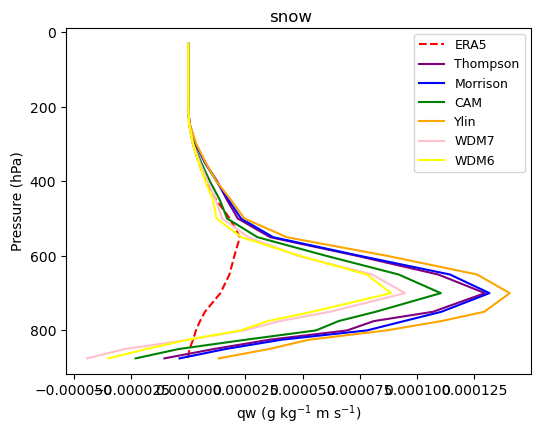

In [19]:
# Graphs W*TH, W*Q
nrows, ncols = 1,1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6,4.5))
fig.suptitle('snow', y=0.92)


plt.plot(wqERA.values, wqERA.level, linestyle='dashed', color='r', label='ERA5')
plt.plot(wqtho, wqtho.level, color='purple', label='Thompson')
plt.plot(wqmor, wqmor.level, color='b', label='Morrison')
plt.plot(wqcam, wqcam.level, color='green', label='CAM')
plt.plot(wqylin, wqylin.level, color='orange', label='Ylin')
plt.plot(wqwdm7, wqwdm7.level, color='pink', label='WDM7')
plt.plot(wqwdm6, wqwdm6.level, color='yellow', label='WDM6')
plt.xlabel(r'qw (g kg$^{-1}$ m s$^{-1}$)')
plt.ylabel('Pressure (hPa)')
plt.gca().invert_yaxis() #to invert y axis: 1000 hPa is rougly sea level = 0 height
axs.legend(fontsize=9)

# Save the plot as a hd file
#plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_paper_hd/wq-profile-mcs.png', dpi=400, bbox_inches='tight')

## Heatmaps of qw

In [20]:
# Mean over 2d space to have vertical level and time
means_qERA = (ds_ERAc.q).mean(dim=('latitude', 'longitude')) #q in kg/kg

#to convert w from pa/s to m/s
l_wERA = metpy.calc.vertical_velocity(ds_ERAc.w, ds_ERAc.level * units.hPa, ds_ERAc.t * units.kelvin, mixing_ratio=0)
means_wERA =(l_wERA).mean(dim=('latitude',  'longitude')) 


In [21]:
# THETA
# Average over time and 2d space for ERA5 variables
means_tERA = (ds_ERAc.t).mean(dim=('latitude', 'longitude')) #temperature in K

# Compute potential temperature of ERA5
means_thERA = metpy.calc.potential_temperature(ds_ERA.level * units.hPa, means_tERA * units.kelvin)

In [22]:
# Transpose to have time and levels in the right order for graphs
w_st = means_wERA.transpose(transpose_coords=True, missing_dims='raise') #to have the right order in time and levels
q_st = means_qERA.transpose(transpose_coords=True, missing_dims='raise')
t_st = means_tERA.transpose(transpose_coords=True, missing_dims='raise')

# Select shared levels of ERA5 and WRF
w_st = w_st.sel(level=ulev)
q_st = q_st.sel(level=ulev)
t_st = t_st.sel(level=ulev)

In [23]:
# Compute W*TH and W*Q for time heatmap
wq_st = w_st * q_st

In [24]:
# Mean over latitude to be able to interpolate (3d datasets) - this is for levels (don't have to do it again)
thoprla_lev = thopr_lev.mean(dim=('latitude'))
morprla_lev = morpr_lev.mean(dim=('latitude'))
camprla_lev = campr_lev.mean(dim=('latitude'))
ylinprla_lev = ylinpr_lev.mean(dim=('latitude'))
wdm7prla_lev = wdm7pr_lev.mean(dim=('latitude'))
wdm6prla_lev = wdm6pr_lev.mean(dim=('latitude'))

# Transpose to have bottom_top as first to be able to interpolate
thoprla_lev = thoprla_lev.transpose('bottom_top','XTIME','longitude')
morprla_lev = morprla_lev.transpose('bottom_top','XTIME','longitude')
camprla_lev = camprla_lev.transpose('bottom_top','XTIME','longitude')
ylinprla_lev = ylinprla_lev.transpose('bottom_top','XTIME','longitude')
wdm7prla_lev = wdm7prla_lev.transpose('bottom_top','XTIME','longitude')
wdm6prla_lev = wdm6prla_lev.transpose('bottom_top','XTIME','longitude')

In [25]:
# Define shared levels
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

#W mean over latitude for variable and levels to have 3d data to interpolate
meanla_wtho = (ids_wthoc.W).mean(dim=('latitude'))
meanla_wmor = (ids_wmorc.W).mean(dim=('latitude'))
meanla_wcam = (ids_wcamc.W).mean(dim=('latitude'))
meanla_wylin = (ids_wylinc.W).mean(dim=('latitude'))
meanla_wwdm7 = (ids_wwdm7c.W).mean(dim=('latitude'))
meanla_wwdm6 = (ids_wwdm6c.W).mean(dim=('latitude'))

#change the order of dimensions to interpolate on levels (bottom_top_stag has to be first)
meanla_wtho = meanla_wtho.transpose('bottom_top_stag','XTIME','longitude')
meanla_wmor = meanla_wmor.transpose('bottom_top_stag','XTIME','longitude')
meanla_wcam = meanla_wcam.transpose('bottom_top_stag','XTIME','longitude')
meanla_wylin = meanla_wylin.transpose('bottom_top_stag','XTIME','longitude')
meanla_wwdm7 = meanla_wwdm7.transpose('bottom_top_stag','XTIME','longitude')
meanla_wwdm6 = meanla_wwdm6.transpose('bottom_top_stag','XTIME','longitude')

#interpolate 3d data
dsii_wthoc = wrf.interplevel(meanla_wtho, thoprla_lev, ulev)
dsii_wmorc = wrf.interplevel(meanla_wmor, morprla_lev, ulev)
dsii_wcamc = wrf.interplevel(meanla_wcam, camprla_lev, ulev)
dsii_wylinc = wrf.interplevel(meanla_wylin, ylinprla_lev, ulev)
dsii_wwdm7c = wrf.interplevel(meanla_wwdm7, wdm7prla_lev, ulev)
dsii_wwdm6c = wrf.interplevel(meanla_wwdm6, wdm6prla_lev, ulev)

In [26]:
# 3D interpolation to fix W heatmaps
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

iimeanl_wtho = np.zeros([144,25])
iimeanl_wmor = np.zeros([144,25])
iimeanl_wcam = np.zeros([144,25])
iimeanl_wylin = np.zeros([144,25])
iimeanl_wwdm7 = np.zeros([144,25])
iimeanl_wwdm6 = np.zeros([144,25])

for t in range(144):
    dsi_wthoc = wrf.interplevel(ids_wthoc.W.values[t], thoprt_lev, ulev)
    iimeanl_wtho[t] = np.nanmean(dsi_wthoc,axis=(1,2))

    dsi_wmorc = wrf.interplevel(ids_wmorc.W.values[t], morprt_lev, ulev)
    iimeanl_wmor[t] = np.nanmean(dsi_wmorc,axis=(1,2))

    dsi_wcamc = wrf.interplevel(ids_wcamc.W.values[t], camprt_lev, ulev)
    iimeanl_wcam[t] = np.nanmean(dsi_wcamc,axis=(1,2))
    
    dsi_wylinc = wrf.interplevel(ids_wylinc.W.values[t], ylinprt_lev, ulev)
    iimeanl_wylin[t] = np.nanmean(dsi_wylinc,axis=(1,2))

    dsi_wwdm7c = wrf.interplevel(ids_wwdm7c.W.values[t], wdm7prt_lev, ulev)
    iimeanl_wwdm7[t] = np.nanmean(dsi_wwdm7c,axis=(1,2))

    dsi_wwdm6c = wrf.interplevel(ids_wwdm6c.W.values[t], wdm6prt_lev, ulev)
    iimeanl_wwdm6[t] = np.nanmean(dsi_wwdm6c,axis=(1,2))

In [27]:
# 3D interpolation to fix W heatmaps
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

iimeanl_wtho = np.zeros([144,25,61])
iimeanl_wmor = np.zeros([144,25,61])
iimeanl_wcam = np.zeros([144,25,61])
iimeanl_wylin = np.zeros([144,25,61])
iimeanl_wwdm7 = np.zeros([144,25,61])
iimeanl_wwdm6 = np.zeros([144,25,61])

for t in range(144):
    dsi_wthoc = wrf.interplevel(ids_wthoc.W.values[t], thoprt_lev, ulev)
    iimeanl_wtho[t] =  np.nanmean(dsi_wthoc,axis=(1)) # dsi_wthoc.sel(axis=33)

    dsi_wmorc = wrf.interplevel(ids_wmorc.W.values[t], morprt_lev, ulev)
    iimeanl_wmor[t] = np.nanmean(dsi_wmorc,axis=(1))

    dsi_wcamc = wrf.interplevel(ids_wcamc.W.values[t], camprt_lev, ulev)
    iimeanl_wcam[t] = np.nanmean(dsi_wcamc,axis=(1))
    
    dsi_wylinc = wrf.interplevel(ids_wylinc.W.values[t], ylinprt_lev, ulev)
    iimeanl_wylin[t] = np.nanmean(dsi_wylinc,axis=(1))

    dsi_wwdm7c = wrf.interplevel(ids_wwdm7c.W.values[t], wdm7prt_lev, ulev)
    iimeanl_wwdm7[t] = np.nanmean(dsi_wwdm7c,axis=(1))

    dsi_wwdm6c = wrf.interplevel(ids_wwdm6c.W.values[t], wdm6prt_lev, ulev)
    iimeanl_wwdm6[t] = np.nanmean(dsi_wwdm6c,axis=(1))

In [28]:
iimeant_wtho = np.nanmean(iimeanl_wtho, axis=0)
iimeant_wmor = np.nanmean(iimeanl_wmor, axis=0)
iimeant_wcam = np.nanmean(iimeanl_wcam, axis=0)
iimeant_wylin = np.nanmean(iimeanl_wylin, axis=0)
iimeant_wwdm7 = np.nanmean(iimeanl_wwdm7, axis=0)
iimeant_wwdm6 = np.nanmean(iimeanl_wwdm6, axis=0)

means_wERA = means_wERA.sel(level=ulev)

In [29]:
# Q mean over latitude for variable and levels to have 3d data to interpolate
meanla_qtho = (ds_qthoc.QVAPOR).mean(dim=('latitude'))
meanla_qmor = (ds_qmorc.QVAPOR).mean(dim=('latitude'))
meanla_qcam = (ds_qcamc.QVAPOR).mean(dim=('latitude'))
meanla_qylin = (ds_qylinc.QVAPOR).mean(dim=('latitude'))
meanla_qwdm7 = (ds_qwdm7c.QVAPOR).mean(dim=('latitude'))
meanla_qwdm6 = (ds_qwdm6c.QVAPOR).mean(dim=('latitude'))

# Change the order of dimensions to interpolate on levels (bottom_top has to be first)
meanla_qtho = meanla_qtho.transpose('bottom_top','XTIME','longitude')
meanla_qmor = meanla_qmor.transpose('bottom_top','XTIME','longitude')
meanla_qcam = meanla_qcam.transpose('bottom_top','XTIME','longitude')
meanla_qylin = meanla_qylin.transpose('bottom_top','XTIME','longitude')
meanla_qwdm7 = meanla_qwdm7.transpose('bottom_top','XTIME','longitude')
meanla_qwdm6 = meanla_qwdm6.transpose('bottom_top','XTIME','longitude')

# Interpolate 3d data
dsii_qthoc = wrf.interplevel(meanla_qtho, thoprla_lev, ulev)
dsii_qmorc = wrf.interplevel(meanla_qmor, morprla_lev, ulev)
dsii_qcamc = wrf.interplevel(meanla_qcam, camprla_lev, ulev)
dsii_qylinc = wrf.interplevel(meanla_qylin, ylinprla_lev, ulev)
dsii_qwdm7c = wrf.interplevel(meanla_qwdm7, wdm7prla_lev, ulev)
dsii_qwdm6c = wrf.interplevel(meanla_qwdm6, wdm6prla_lev, ulev)

# Mean over longitude to have levels vs time to have heatmaps
iimeanl_qtho = dsii_qthoc.mean(dim=('longitude'))
iimeanl_qmor = dsii_qmorc.mean(dim=('longitude'))
iimeanl_qcam = dsii_qcamc.mean(dim=('longitude'))
iimeanl_qylin = dsii_qylinc.mean(dim=('longitude'))
iimeanl_qwdm7 = dsii_qwdm7c.mean(dim=('longitude'))
iimeanl_qwdm6 = dsii_qwdm6c.mean(dim=('longitude'))

In [30]:
# Rename vertical level to have the right w*t, w*q
meanla_wtho = meanla_wtho.rename({'bottom_top_stag': 'bottom_top'})
meanla_wmor = meanla_wmor.rename({'bottom_top_stag': 'bottom_top'})
meanla_wcam = meanla_wcam.rename({'bottom_top_stag': 'bottom_top'})
meanla_wylin = meanla_wylin.rename({'bottom_top_stag': 'bottom_top'})
meanla_wwdm7 = meanla_wwdm7.rename({'bottom_top_stag': 'bottom_top'})
meanla_wwdm6 = meanla_wwdm6.rename({'bottom_top_stag': 'bottom_top'})

In [31]:
# Compute W*TH and W*Q
meanla_wqtho = meanla_wtho*meanla_qtho
meanla_wqmor = meanla_wmor*meanla_qmor
meanla_wqcam = meanla_wcam*meanla_qcam
meanla_wqylin = meanla_wylin*meanla_qylin
meanla_wqwdm7 = meanla_wwdm7*meanla_qwdm7
meanla_wqwdm6 = meanla_wwdm6*meanla_qwdm6

In [32]:
# W*Q

# Change the order of dimensions to interpolate on levels (bottom_top_stag has to be first)
meanla_wqtho = meanla_wqtho.transpose('bottom_top','XTIME','longitude')
meanla_wqmor = meanla_wqmor.transpose('bottom_top','XTIME','longitude')
meanla_wqcam = meanla_wqcam.transpose('bottom_top','XTIME','longitude')
meanla_wqylin = meanla_wqylin.transpose('bottom_top','XTIME','longitude')
meanla_wqwdm7 = meanla_wqwdm7.transpose('bottom_top','XTIME','longitude')
meanla_wqwdm6 = meanla_wqwdm6.transpose('bottom_top','XTIME','longitude')

# Interpolate 3d data
dsii_wqthoc = wrf.interplevel(meanla_wqtho, thoprla_lev, ulev)
dsii_wqmorc = wrf.interplevel(meanla_wqmor, morprla_lev, ulev)
dsii_wqcamc = wrf.interplevel(meanla_wqcam, camprla_lev, ulev)
dsii_wqylinc = wrf.interplevel(meanla_wqylin, ylinprla_lev, ulev)
dsii_wqwdm7c = wrf.interplevel(meanla_wqwdm7, wdm7prla_lev, ulev)
dsii_wqwdm6c = wrf.interplevel(meanla_wqwdm6, wdm6prla_lev, ulev)

# Mean over longitude to have levels vs time to have heatmaps
iimeanl_wqtho = dsii_wqthoc.mean(dim=('longitude'))
iimeanl_wqmor = dsii_wqmorc.mean(dim=('longitude'))
iimeanl_wqcam = dsii_wqcamc.mean(dim=('longitude'))
iimeanl_wqylin = dsii_wqylinc.mean(dim=('longitude'))
iimeanl_wqwdm7 = dsii_wqwdm7c.mean(dim=('longitude'))
iimeanl_wqwdm6 = dsii_wqwdm6c.mean(dim=('longitude'))

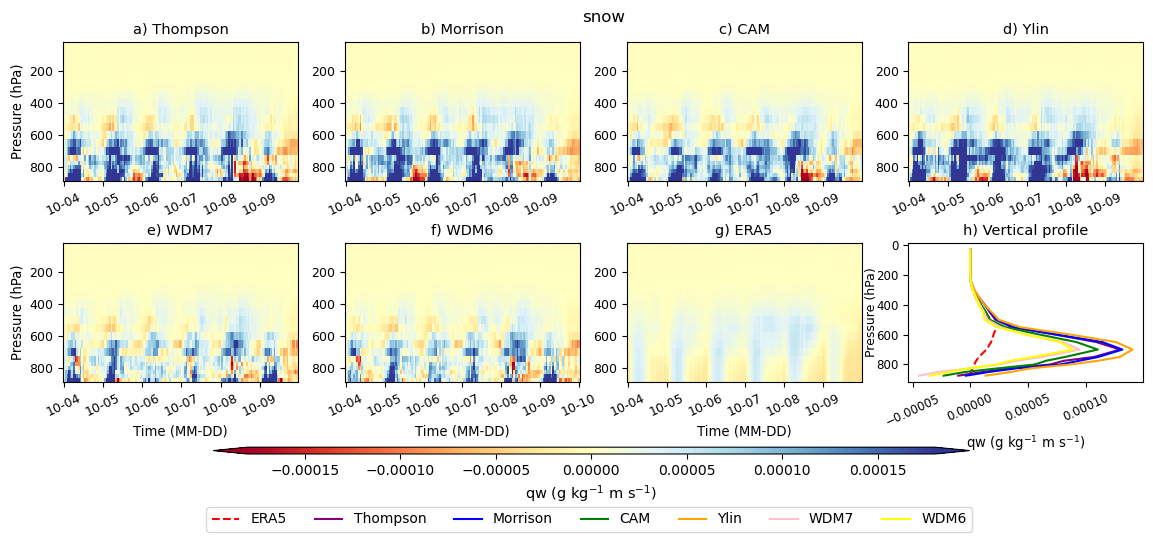

In [33]:
import matplotlib.dates as mdates
import datetime
from matplotlib.ticker import MaxNLocator, FuncFormatter, ScalarFormatter

times=['10-04', '10-05', '10-06', '10-07', '10-08', '10-09']
time=['2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09']
time = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in time]
date_format = mdates.DateFormatter('%m-%d')

# Interpolated heatmaps for WQ
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
axs=axs.flatten()
fig.suptitle('snow', y=1.03)

for i in range(0,7):
   axs[i].xaxis.set_major_formatter(date_format)
   axs[i].tick_params(axis='x', labelrotation = 25)
   axs[i].tick_params(axis='x', labelsize=9)  
   axs[i].tick_params(axis='y', labelsize=9)

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-0.02, vmax=0.04, vcenter=0)
#
heatmap1 = axs[0].pcolormesh(iimeanl_wqtho.XTIME, iimeanl_wqtho.level, iimeanl_wqtho, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[0].set_title('a) Thompson', fontsize=10.5)
axs[0].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[0].invert_yaxis()
#
heatmap2 = axs[1].pcolormesh(iimeanl_wqmor.XTIME, iimeanl_wqmor.level, iimeanl_wqmor, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[1].set_title('b) Morrison', fontsize=10.5)
axs[1].invert_yaxis()
#
heatmap3 = axs[2].pcolormesh(iimeanl_wqcam.XTIME, iimeanl_wqcam.level, iimeanl_wqcam, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[2].set_title('c) CAM', fontsize=10.5)
axs[2].invert_yaxis()
#
heatmap4 = axs[3].pcolormesh(iimeanl_wqylin.XTIME, iimeanl_wqylin.level, iimeanl_wqylin, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[3].set_title('d) Ylin', fontsize=10.5)
#axs[3].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[3].invert_yaxis()
#
heatmap5 = axs[4].pcolormesh(iimeanl_wqwdm7.XTIME, iimeanl_wqwdm7.level, iimeanl_wqwdm7, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[4].set_title('e) WDM7', fontsize=10.5)
axs[4].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[4].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[4].invert_yaxis()
#
heatmap6 = axs[5].pcolormesh(iimeanl_wqwdm6.XTIME, iimeanl_wqwdm6.level, iimeanl_wqwdm6, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[5].set_title('f) WDM6', fontsize=10.5)
axs[5].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[5].invert_yaxis()

# w
heatmap7 = axs[6].pcolormesh(wq_st.time, wq_st.level, wq_st, cmap='RdYlBu', vmin=-0.00018, vmax=0.00018)
axs[6].set_yticks([200,400,600,800])
axs[6].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[6].invert_yaxis()
axs[6].set_title('g) ERA5', fontsize=10.5)

# plot
axs[7].plot(wqERA.values, wqERA.level, linestyle='dashed', color='r', label='ERA5')
axs[7].plot(wqtho, wqtho.level, color='purple', label='Thompson')
axs[7].plot(wqmor, wqmor.level, color='b', label='Morrison')
axs[7].plot(wqcam, wqcam.level, color='green', label='CAM')
axs[7].plot(wqylin, wqylin.level, color='orange', label='Ylin')
axs[7].plot(wqwdm7, wqwdm7.level, color='pink', label='WDM7')
axs[7].plot(wqwdm6, wqwdm6.level, color='yellow', label='WDM6')
axs[7].set_xlabel(r'qw (g kg$^{-1}$ m s$^{-1}$)')
axs[7].set_ylabel('Pressure (hPa)', fontsize=9, labelpad=-1)
axs[7].invert_yaxis() 
axs[7].tick_params(axis='x', rotation=25, labelsize=8.5)
axs[7].tick_params(axis='y', labelsize=8.5)
axs[7].set_title('h) Vertical profile', fontsize=10.5)
axs[7].set_xlabel(r'qw (g kg$^{-1}$ m s$^{-1}$)', fontsize=9.5)

#formatter = ScalarFormatter(useMathText=True)
#formatter.set_powerlimits((-1, 1))
#axs[7].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#offset_text = axs[7].yaxis.get_offset_text()
#offset_text.set_fontsize(8.5) 

# Adjust layout to prevent clipping of axis labels
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.45)
# Add colorbar
cbar_ax = fig.add_axes([0.175, -0.08, 0.63, 0.017])
cbar=plt.colorbar(heatmap1, cax=cbar_ax, orientation='horizontal', extend='both')
axs[7].legend(loc='upper right', ncol=7, bbox_to_anchor=(0.3, -0.85))
cbar.set_label(r'qw (g kg$^{-1}$ m s$^{-1}$)', fontsize = 10.5)

# Save the plot as a hd file
#plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_paper_hd/wq-profile-snow.png', dpi=400, bbox_inches='tight')

In [34]:
## FIXED FROM HERE

In [35]:
# Define shared levels
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

# W mean over latitude for variable and levels to have 3d data to interpolate
meanla_wtho = (ids_wthoc.W).mean(dim=('latitude'))
meanla_wmor = (ids_wmorc.W).mean(dim=('latitude'))
meanla_wcam = (ids_wcamc.W).mean(dim=('latitude'))
meanla_wylin = (ids_wylinc.W).mean(dim=('latitude'))
meanla_wwdm7 = (ids_wwdm7c.W).mean(dim=('latitude'))
meanla_wwdm6 = (ids_wwdm6c.W).mean(dim=('latitude'))

# Change the order of dimensions to interpolate on levels (bottom_top_stag has to be first)
meanla_wtho = meanla_wtho.transpose('bottom_top_stag','XTIME','longitude')
meanla_wmor = meanla_wmor.transpose('bottom_top_stag','XTIME','longitude')
meanla_wcam = meanla_wcam.transpose('bottom_top_stag','XTIME','longitude')
meanla_wylin = meanla_wylin.transpose('bottom_top_stag','XTIME','longitude')
meanla_wwdm7 = meanla_wwdm7.transpose('bottom_top_stag','XTIME','longitude')
meanla_wwdm6 = meanla_wwdm6.transpose('bottom_top_stag','XTIME','longitude')

# Interpolate 3d data
dsii_wthoc = wrf.interplevel(meanla_wtho, thoprla_lev, ulev)
dsii_wmorc = wrf.interplevel(meanla_wmor, morprla_lev, ulev)
dsii_wcamc = wrf.interplevel(meanla_wcam, camprla_lev, ulev)
dsii_wylinc = wrf.interplevel(meanla_wylin, ylinprla_lev, ulev)
dsii_wwdm7c = wrf.interplevel(meanla_wwdm7, wdm7prla_lev, ulev)
dsii_wwdm6c = wrf.interplevel(meanla_wwdm6, wdm6prla_lev, ulev)

In [36]:
# Define shared levels
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

# W mean over latitude for variable and levels to have 3d data to interpolate
meanla_qtho = (ds_qthoc.QVAPOR).mean(dim=('latitude'))
meanla_qmor = (ds_qmorc.QVAPOR).mean(dim=('latitude'))
meanla_qcam = (ds_qcamc.QVAPOR).mean(dim=('latitude'))
meanla_qylin = (ds_qylinc.QVAPOR).mean(dim=('latitude'))
meanla_qwdm7 = (ds_qwdm7c.QVAPOR).mean(dim=('latitude'))
meanla_qwdm6 = (ds_qwdm6c.QVAPOR).mean(dim=('latitude'))

# Change the order of dimensions to interpolate on levels (bottom_top_stag has to be first)
meanla_qtho = meanla_qtho.transpose('bottom_top','XTIME','longitude')
meanla_qmor = meanla_qmor.transpose('bottom_top','XTIME','longitude')
meanla_qcam = meanla_qcam.transpose('bottom_top','XTIME','longitude')
meanla_qylin = meanla_qylin.transpose('bottom_top','XTIME','longitude')
meanla_qwdm7 = meanla_qwdm7.transpose('bottom_top','XTIME','longitude')
meanla_qwdm6 = meanla_qwdm6.transpose('bottom_top','XTIME','longitude')

# Interpolate 3d data
dsii_qthoc = wrf.interplevel(meanla_qtho, thoprla_lev, ulev)
dsii_qmorc = wrf.interplevel(meanla_qmor, morprla_lev, ulev)
dsii_qcamc = wrf.interplevel(meanla_qcam, camprla_lev, ulev)
dsii_qylinc = wrf.interplevel(meanla_qylin, ylinprla_lev, ulev)
dsii_qwdm7c = wrf.interplevel(meanla_qwdm7, wdm7prla_lev, ulev)
dsii_qwdm6c = wrf.interplevel(meanla_qwdm6, wdm6prla_lev, ulev)

In [37]:
# 3D interpolation to fix W heatmaps
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

iimeanl_wtho = np.zeros([144,25])
iimeanl_wmor = np.zeros([144,25])
iimeanl_wcam = np.zeros([144,25])
iimeanl_wylin = np.zeros([144,25])
iimeanl_wwdm7 = np.zeros([144,25])
iimeanl_wwdm6 = np.zeros([144,25])

for t in range(144):
    dsi_wthoc = wrf.interplevel(ids_wthoc.W.values[t], thoprt_lev, ulev)
    iimeanl_wtho[t] = np.nanmean(dsi_wthoc,axis=(1,2))

    dsi_wmorc = wrf.interplevel(ids_wmorc.W.values[t], morprt_lev, ulev)
    iimeanl_wmor[t] = np.nanmean(dsi_wmorc,axis=(1,2))
    
    dsi_wcamc = wrf.interplevel(ids_wcamc.W.values[t], camprt_lev, ulev)
    iimeanl_wcam[t] = np.nanmean(dsi_wcamc,axis=(1,2))

    dsi_wylinc = wrf.interplevel(ids_wylinc.W.values[t], ylinprt_lev, ulev)
    iimeanl_wylin[t] = np.nanmean(dsi_wylinc,axis=(1,2))

    dsi_wwdm7c = wrf.interplevel(ids_wwdm7c.W.values[t], wdm7prt_lev, ulev)
    iimeanl_wwdm7[t] = np.nanmean(dsi_wwdm7c,axis=(1,2))

    dsi_wwdm6c = wrf.interplevel(ids_wwdm6c.W.values[t], wdm6prt_lev, ulev)
    iimeanl_wwdm6[t] = np.nanmean(dsi_wwdm6c,axis=(1,2))

In [38]:
# 3D interpolation to fix W heatmaps
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

iimeanl_qtho = np.zeros([144,25])
iimeanl_qmor = np.zeros([144,25])
iimeanl_qcam = np.zeros([144,25])
iimeanl_qylin = np.zeros([144,25])
iimeanl_qwdm7 = np.zeros([144,25])
iimeanl_qwdm6 = np.zeros([144,25])

for t in range(144):
    dsi_qthoc = wrf.interplevel(ds_qthoc.QVAPOR.values[t], thoprt_lev, ulev)
    iimeanl_qtho[t] = np.nanmean(dsi_qthoc,axis=(1,2))

    dsi_qmorc = wrf.interplevel(ds_qmorc.QVAPOR.values[t], morprt_lev, ulev)
    iimeanl_qmor[t] = np.nanmean(dsi_qmorc,axis=(1,2))
    
    dsi_qcamc = wrf.interplevel(ds_qcamc.QVAPOR.values[t], camprt_lev, ulev)
    iimeanl_qcam[t] = np.nanmean(dsi_qcamc,axis=(1,2))

    dsi_qylinc = wrf.interplevel(ds_qylinc.QVAPOR.values[t], ylinprt_lev, ulev)
    iimeanl_qylin[t] = np.nanmean(dsi_qylinc,axis=(1,2))

    dsi_qwdm7c = wrf.interplevel(ds_qwdm7c.QVAPOR.values[t], wdm7prt_lev, ulev)
    iimeanl_qwdm7[t] = np.nanmean(dsi_qwdm7c,axis=(1,2))

    dsi_qwdm6c = wrf.interplevel(ds_qwdm6c.QVAPOR.values[t], wdm6prt_lev, ulev)
    iimeanl_qwdm6[t] = np.nanmean(dsi_qwdm6c,axis=(1,2))

In [39]:
# Define shared levels THETA
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

# W mean over latitude for variable and levels to have 3d data to interpolate
meanla_ttho = (ds_tthoc.T).mean(dim=('latitude'))
meanla_tmor = (ds_tmorc.T).mean(dim=('latitude'))
meanla_tcam = (ds_tcamc.T).mean(dim=('latitude'))
meanla_tylin = (ds_tylinc.T).mean(dim=('latitude'))
meanla_twdm7 = (ds_twdm7c.T).mean(dim=('latitude'))
meanla_twdm6 = (ds_twdm6c.T).mean(dim=('latitude'))

# Change the order of dimensions to interpolate on levels (bottom_top_stag has to be first)
meanla_ttho = meanla_ttho.transpose('bottom_top','XTIME','longitude')
meanla_tmor = meanla_tmor.transpose('bottom_top','XTIME','longitude')
meanla_tcam = meanla_tcam.transpose('bottom_top','XTIME','longitude')
meanla_tylin = meanla_tylin.transpose('bottom_top','XTIME','longitude')
meanla_twdm7 = meanla_twdm7.transpose('bottom_top','XTIME','longitude')
meanla_twdm6 = meanla_twdm6.transpose('bottom_top','XTIME','longitude')

# Interpolate 3d data
dsii_tthoc = wrf.interplevel(meanla_ttho, thoprla_lev, ulev)
dsii_tmorc = wrf.interplevel(meanla_tmor, morprla_lev, ulev)
dsii_tcamc = wrf.interplevel(meanla_tcam, camprla_lev, ulev)
dsii_tylinc = wrf.interplevel(meanla_tylin, ylinprla_lev, ulev)
dsii_twdm7c = wrf.interplevel(meanla_twdm7, wdm7prla_lev, ulev)
dsii_twdm6c = wrf.interplevel(meanla_twdm6, wdm6prla_lev, ulev)

In [40]:
# 3D interpolation to fix W heatmaps THETA
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

iimeanl_ttho = np.zeros([144,25])
iimeanl_tmor = np.zeros([144,25])
iimeanl_tcam = np.zeros([144,25])
iimeanl_tylin = np.zeros([144,25])
iimeanl_twdm7 = np.zeros([144,25])
iimeanl_twdm6 = np.zeros([144,25])

for t in range(144):
    dsi_tthoc = wrf.interplevel(ds_tthoc.T.values[t], thoprt_lev, ulev)
    iimeanl_ttho[t] = np.nanmean(dsi_tthoc,axis=(1,2))

    dsi_tmorc = wrf.interplevel(ds_tmorc.T.values[t], morprt_lev, ulev)
    iimeanl_tmor[t] = np.nanmean(dsi_tmorc,axis=(1,2))
    
    dsi_tcamc = wrf.interplevel(ds_tcamc.T.values[t], camprt_lev, ulev)
    iimeanl_tcam[t] = np.nanmean(dsi_tcamc,axis=(1,2))

    dsi_tylinc = wrf.interplevel(ds_tylinc.T.values[t], ylinprt_lev, ulev)
    iimeanl_tylin[t] = np.nanmean(dsi_tylinc,axis=(1,2))

    dsi_twdm7c = wrf.interplevel(ds_twdm7c.T.values[t], wdm7prt_lev, ulev)
    iimeanl_twdm7[t] = np.nanmean(dsi_twdm7c,axis=(1,2))

    dsi_twdm6c = wrf.interplevel(ds_twdm6c.T.values[t], wdm6prt_lev, ulev)
    iimeanl_twdm6[t] = np.nanmean(dsi_twdm6c,axis=(1,2))

In [41]:
iimeanl_qwtho = iimeanl_qtho*iimeanl_wtho
iimeanl_qwmor = iimeanl_qmor*iimeanl_wmor
iimeanl_qwcam = iimeanl_qcam*iimeanl_wcam
iimeanl_qwylin = iimeanl_qylin*iimeanl_wylin
iimeanl_qwwdm7 = iimeanl_qwdm7*iimeanl_wwdm7
iimeanl_qwwdm6 = iimeanl_qwdm6*iimeanl_wwdm6

In [42]:
# For the plot: do averages over pressure levels and get daily average
lmean_wtho = np.mean(iimeanl_qwtho.T, axis=0) #first dimension is level and second is time
lmean_wmor = np.mean(iimeanl_qwmor.T, axis=0)
lmean_wcam = np.mean(iimeanl_qwcam.T, axis=0)
lmean_wylin = np.mean(iimeanl_qwylin.T, axis=0)
lmean_wwdm7 = np.mean(iimeanl_qwwdm7.T, axis=0)
lmean_wwdm6 = np.mean(iimeanl_qwwdm6.T, axis=0)
lmean_wERA = np.mean(wq_st, axis=0)

In [43]:
# Calculate daily mean and then plot 10 points
groupsc = [[lmean_wtho[x:x+24] for x in range(0, len(lmean_wtho), 24)], [lmean_wmor[x:x+24] for x in range(0, len(lmean_wmor), 24)], [lmean_wcam[x:x+24] for x in range(0, len(lmean_wcam), 24)], [lmean_wylin[x:x+24] for x in range(0, len(lmean_wylin), 24)], [lmean_wwdm7[x:x+24] for x in range(0, len(lmean_wwdm7), 24)], [lmean_wwdm6[x:x+24] for x in range(0, len(lmean_wwdm6), 24)], [lmean_wERA[x:x+24] for x in range(0, len(lmean_wERA), 24)]]

# Simple math to calculate the means
wavgdaily = np.zeros((7,6))
for m in range(0,7): #number of datasets
 for i in range(0,6): #nine days
    wavgdaily[m][i] = sum(groupsc[m][i])/24;

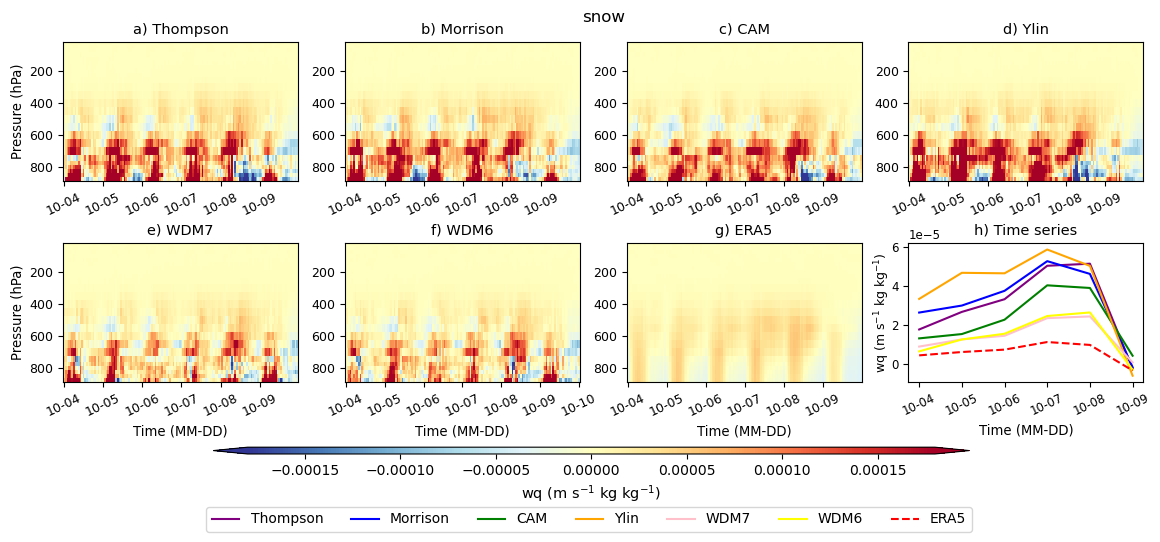

In [44]:
import matplotlib.dates as mdates
import datetime
from matplotlib.ticker import MaxNLocator, FuncFormatter, ScalarFormatter

times=['10-04', '10-05', '10-06', '10-07', '10-08', '10-09']
time=['2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09']
time = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in time]
date_format = mdates.DateFormatter('%m-%d')

# Interpolated heatmaps for WQ
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
axs=axs.flatten()
fig.suptitle('snow', y=1.03)

for i in range(0,7):
   axs[i].xaxis.set_major_formatter(date_format)
   axs[i].tick_params(axis='x', labelrotation = 25)
   axs[i].tick_params(axis='x', labelsize=9)  
   axs[i].tick_params(axis='y', labelsize=9)

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-0.02, vmax=0.04, vcenter=0)
#
heatmap1 = axs[0].pcolormesh(iimeanl_wqtho.XTIME, iimeanl_wqtho.level, iimeanl_wqtho, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[0].set_title('a) Thompson', fontsize=10.5)
axs[0].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[0].invert_yaxis()
#
heatmap2 = axs[1].pcolormesh(iimeanl_wqmor.XTIME, iimeanl_wqmor.level, iimeanl_wqmor, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[1].set_title('b) Morrison', fontsize=10.5)
axs[1].invert_yaxis()
#
heatmap3 = axs[2].pcolormesh(iimeanl_wqcam.XTIME, iimeanl_wqcam.level, iimeanl_wqcam, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[2].set_title('c) CAM', fontsize=10.5)
axs[2].invert_yaxis()
#
heatmap4 = axs[3].pcolormesh(iimeanl_wqylin.XTIME, iimeanl_wqylin.level, iimeanl_wqylin, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[3].set_title('d) Ylin', fontsize=10.5)
#axs[3].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[3].invert_yaxis()
#
heatmap5 = axs[4].pcolormesh(iimeanl_wqwdm7.XTIME, iimeanl_wqwdm7.level, iimeanl_wqwdm7, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[4].set_title('e) WDM7', fontsize=10.5)
axs[4].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[4].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[4].invert_yaxis()
#
heatmap6 = axs[5].pcolormesh(iimeanl_wqwdm6.XTIME, iimeanl_wqwdm6.level, iimeanl_wqwdm6, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[5].set_title('f) WDM6', fontsize=10.5)
axs[5].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[5].invert_yaxis()

# w
heatmap7 = axs[6].pcolormesh(wq_st.time, wq_st.level, wq_st, cmap='RdYlBu_r', vmin=-0.00018, vmax=0.00018)
axs[6].set_yticks([200,400,600,800])
axs[6].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[6].invert_yaxis()
axs[6].set_title('g) ERA5', fontsize=10.5)

# plot
axs[7].plot(times, wavgdaily[0], color='purple', label='Thompson')
axs[7].plot(times, wavgdaily[1], color='blue', label='Morrison')
axs[7].plot(times, wavgdaily[2], color='green', label='CAM')
axs[7].plot(times, wavgdaily[3], color='orange', label='Ylin')
axs[7].plot(times, wavgdaily[4], color='pink', label='WDM7')
axs[7].plot(times, wavgdaily[5], color='yellow', label='WDM6')
axs[7].plot(times, wavgdaily[6], color='r', linestyle='dashed' ,label='ERA5')
axs[7].set_xlabel(r'wq (m s$^{-1}$ kg kg$^{-1}$)')
axs[7].tick_params(axis='x', rotation=25, labelsize=8.5)
axs[7].tick_params(axis='y', labelsize=8.5)
axs[7].set_title('h) Time series', fontsize=10.5)
axs[7].set_ylabel(r'wq (m s$^{-1}$ kg kg$^{-1}$)', fontsize=9, labelpad=-0.5)
axs[7].set_xlabel(r'Time (MM-DD)', fontsize=9.5)

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
axs[7].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
offset_text = axs[7].yaxis.get_offset_text()
offset_text.set_fontsize(8.5)

# Adjust layout to prevent clipping of axis labels
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.45)
# Add colorbar
cbar_ax = fig.add_axes([0.175, -0.08, 0.63, 0.017])
cbar=plt.colorbar(heatmap1, cax=cbar_ax, orientation='horizontal', extend='both')
axs[7].legend(loc='upper right', ncol=7, bbox_to_anchor=(0.3, -0.85))
cbar.set_label(r'wq (m s$^{-1}$ kg kg$^{-1}$)', fontsize = 10.5)

# Save the plot as a hd file
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_paper_hd/wq-profile-snow.png', dpi=400, bbox_inches='tight')

## Fabians suggestion

In [45]:
def compute_rhowq(p_hPa, theta, w, qv):
    """
    Computes vertical water vapor flux: ρ * w * qv [kg / (m²·s)]

    Accepts inputs as xarray.DataArray, numpy.ndarray, or list.
    """
    # Auto-convert to xarray.DataArray
    p_hPa = xr.DataArray(p_hPa) if not isinstance(p_hPa, xr.DataArray) else p_hPa
    theta = xr.DataArray(theta) if not isinstance(theta, xr.DataArray) else theta
    w = xr.DataArray(w) if not isinstance(w, xr.DataArray) else w
    qv = xr.DataArray(qv) if not isinstance(qv, xr.DataArray) else qv

    R_d = 287.05  # J/(kg·K)
    cp = 1004     # J/(kg·K)
    p0 = 100000.0 # Reference pressure [Pa]

    # Step 0: Convert pressure from hPa to Pa
    p = p_hPa * 100.0

    # Step 1: Convert potential temperature to temperature
    T = theta * (p / p0)**(R_d / cp)

    # Step 2: Compute virtual temperature
    Tv = T * (1 + 0.61 * qv)

    # Step 3: Compute air density
    rho = p / (R_d * Tv)

    # Step 4: Compute vertical water vapor flux
    wv_flux = rho * w * qv
    wv_flux.name = "wv_flux"
    wv_flux.attrs["units"] = "kg m^-2 s^-1"
    wv_flux.attrs["long_name"] = "Vertical Water Vapor Flux"

    return wv_flux


In [46]:
rhowq_tho = compute_rhowq(ulev, iimeanl_ttho.T +300, iimeanl_wtho.T, iimeanl_qtho.T)
rhowq_mor = compute_rhowq(ulev, iimeanl_tmor.T +300, iimeanl_wmor.T, iimeanl_qmor.T)
rhowq_cam = compute_rhowq(ulev, iimeanl_tcam.T +300, iimeanl_wcam.T, iimeanl_qcam.T)
rhowq_ylin = compute_rhowq(ulev, iimeanl_tylin.T +300, iimeanl_wylin.T, iimeanl_qylin.T)
rhowq_wdm7 = compute_rhowq(ulev, iimeanl_twdm7.T +300, iimeanl_wwdm7.T, iimeanl_qwdm7.T)
rhowq_wdm6 = compute_rhowq(ulev, iimeanl_twdm6.T +300, iimeanl_wwdm6.T, iimeanl_qwdm6.T)
rhowq_ERA = compute_rhowq(ulev, t_st.values, w_st.values, q_st.values)

In [47]:
# For the plot: do averages over pressure levels and get daily average
lmean_rhowqtho = np.mean(rhowq_tho, axis=0) #first dimension is level and second is time
lmean_rhowqmor = np.mean(rhowq_mor, axis=0)
lmean_rhowqcam = np.mean(rhowq_cam, axis=0)
lmean_rhowqylin = np.mean(rhowq_ylin, axis=0)
lmean_rhowqwdm7 = np.mean(rhowq_wdm7, axis=0)
lmean_rhowqwdm6 = np.mean(rhowq_wdm6, axis=0)
lmean_rhowqERA = np.mean(rhowq_ERA, axis=0)

In [48]:
# Calculate daily mean and then plot 10 points
groupsc = [[lmean_rhowqtho[x:x+24] for x in range(0, len(lmean_rhowqtho), 24)], [lmean_rhowqmor[x:x+24] for x in range(0, len(lmean_rhowqmor), 24)], [lmean_rhowqcam[x:x+24] for x in range(0, len(lmean_rhowqcam), 24)], [lmean_rhowqylin[x:x+24] for x in range(0, len(lmean_rhowqylin), 24)], [lmean_rhowqwdm7[x:x+24] for x in range(0, len(lmean_rhowqwdm7), 24)], [lmean_rhowqwdm6[x:x+24] for x in range(0, len(lmean_rhowqwdm6), 24)], [lmean_rhowqERA[x:x+24] for x in range(0, len(lmean_rhowqERA), 24)]]

# Simple math to calculate the means
rhowqavgdaily = np.zeros((7,6))

for m in range(0,7): #number of datasets
 for i in range(0,6): #nine days
    rhowqavgdaily[m][i] = sum(groupsc[m][i])/24;


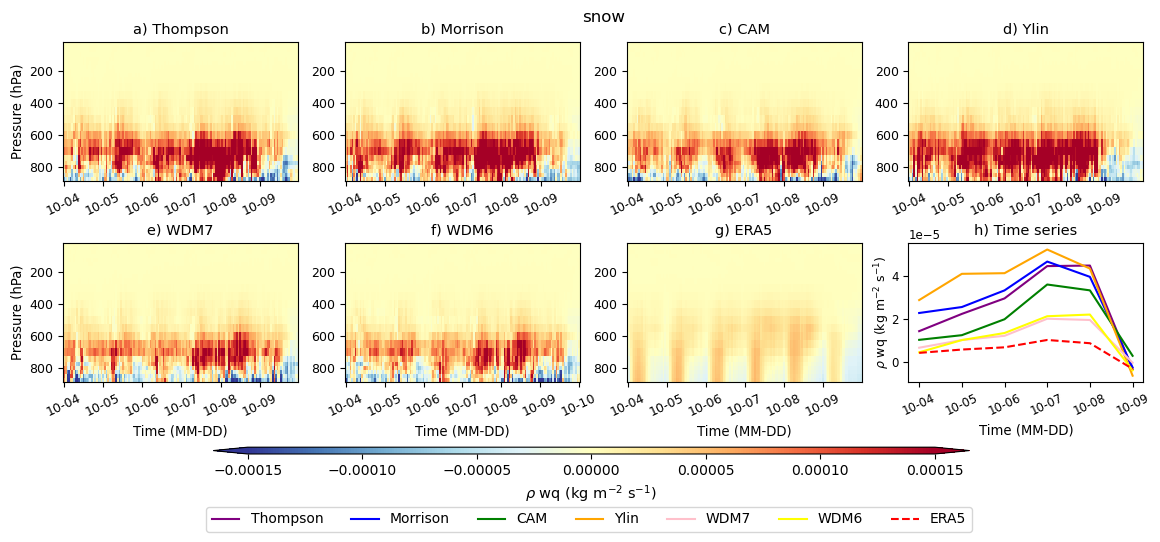

In [49]:
times=['10-04', '10-05', '10-06', '10-07', '10-08', '10-09']
time=['2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09']
time = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in time]
date_format = mdates.DateFormatter('%m-%d')

# Interpolated heatmaps for WQ
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
axs=axs.flatten()
fig.suptitle('snow', y=1.03)

for i in range(0,7):
   axs[i].xaxis.set_major_formatter(date_format)
   axs[i].tick_params(axis='x', labelrotation = 25)
   axs[i].tick_params(axis='x', labelsize=9)  
   axs[i].tick_params(axis='y', labelsize=9)

#
heatmap1 = axs[0].pcolormesh(iimeanl_wqtho.XTIME, iimeanl_wqtho.level, rhowq_tho, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[0].set_title('a) Thompson', fontsize=10.5)
axs[0].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[0].invert_yaxis()
heatmap1.set_rasterized(True)

#
heatmap2 = axs[1].pcolormesh(iimeanl_wqmor.XTIME, iimeanl_wqmor.level, rhowq_mor, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[1].set_title('b) Morrison', fontsize=10.5)
axs[1].invert_yaxis()
heatmap2.set_rasterized(True)

#
heatmap3 = axs[2].pcolormesh(iimeanl_wqcam.XTIME, iimeanl_wqcam.level, rhowq_cam, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[2].set_title('c) CAM', fontsize=10.5)
axs[2].invert_yaxis()
heatmap3.set_rasterized(True)

#
heatmap4 = axs[3].pcolormesh(iimeanl_wqylin.XTIME, iimeanl_wqylin.level, rhowq_ylin, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[3].set_title('d) Ylin', fontsize=10.5)
#axs[3].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[3].invert_yaxis()
heatmap4.set_rasterized(True)

#
heatmap5 = axs[4].pcolormesh(iimeanl_wqwdm7.XTIME, iimeanl_wqwdm7.level, rhowq_wdm7, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[4].set_title('e) WDM7', fontsize=10.5)
axs[4].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[4].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[4].invert_yaxis()
heatmap5.set_rasterized(True)

#
heatmap6 = axs[5].pcolormesh(iimeanl_wqwdm6.XTIME, iimeanl_wqwdm6.level, rhowq_wdm6, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[5].set_title('f) WDM6', fontsize=10.5)
axs[5].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[5].invert_yaxis()
heatmap6.set_rasterized(True)

# w
heatmap7 = axs[6].pcolormesh(wq_st.time, wq_st.level, rhowq_ERA, cmap='RdYlBu_r', vmin=-0.00015, vmax=0.00015)
axs[6].set_yticks([200,400,600,800])
axs[6].set_xlabel('Time (MM-DD)', fontsize=9.5)
axs[6].invert_yaxis()
axs[6].set_title('g) ERA5', fontsize=10.5)
heatmap7.set_rasterized(True)

# plot
axs[7].plot(times, rhowqavgdaily[0], color='purple', label='Thompson')
axs[7].plot(times, rhowqavgdaily[1], color='blue', label='Morrison')
axs[7].plot(times, rhowqavgdaily[2], color='green', label='CAM')
axs[7].plot(times, rhowqavgdaily[3], color='orange', label='Ylin')
axs[7].plot(times, rhowqavgdaily[4], color='pink', label='WDM7')
axs[7].plot(times, rhowqavgdaily[5], color='yellow', label='WDM6')
axs[7].plot(times, rhowqavgdaily[6], color='r', linestyle='dashed' ,label='ERA5')
axs[7].set_xlabel(r'$\rho$ wq (kg m$^{-2}$ s$^{-1}$')
axs[7].tick_params(axis='x', rotation=25, labelsize=8.5)
axs[7].tick_params(axis='y', labelsize=8.5)
axs[7].set_title('h) Time series', fontsize=10.5)
axs[7].set_ylabel(r'$\rho$ wq (kg m$^{-2}$ s$^{-1}$)', fontsize=9, labelpad=-0.5)
axs[7].set_xlabel(r'Time (MM-DD)', fontsize=9.5)
#axs[7].set_ylim(-0.01,0.01)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
axs[7].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
offset_text = axs[7].yaxis.get_offset_text()
offset_text.set_fontsize(8.5)

# Adjust layout to prevent clipping of axis labels
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.45)
# Add colorbar
cbar_ax = fig.add_axes([0.175, -0.08, 0.63, 0.017])
cbar=plt.colorbar(heatmap1, cax=cbar_ax, orientation='horizontal', extend='both')
axs[7].legend(loc='upper right', ncol=7, bbox_to_anchor=(0.3, -0.85))
cbar.set_label(r'$\rho$ wq (kg m$^{-2}$ s$^{-1}$)', fontsize = 10.5)

cbar.solids.set_edgecolor("face")
cbar.solids.set_rasterized(True)
# Save to SVG
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission_svg/rhowq-snow-svg.svg',
            format='svg', dpi=400, bbox_inches='tight')

# Save the plot as a hd file
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_paper_hd/rhowq-profile-snow.png', dpi=400, bbox_inches='tight')